# Load model package

In [1]:
import sys
sys.path.insert(1,'./src_VI/')
from ZIV import ZIV

# Load data simulation package

In [2]:
sys.path.insert(1,'./src_simulation/')
from data_sim import sim_tobit_data, show_sim

# Load other packages

In [3]:
import pandas as pd
import numpy as np

# Zero-inflated simulated data example

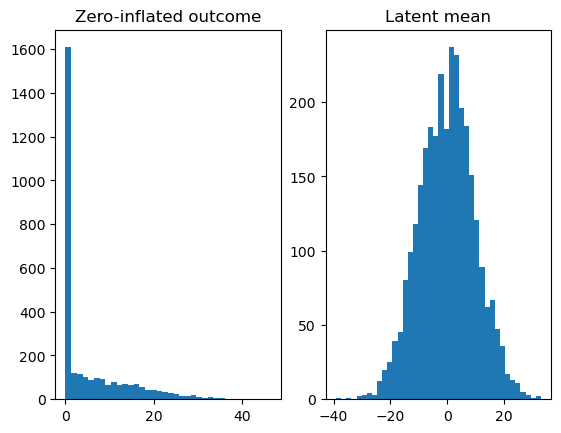

------------------------------------
Feature variance is 95.82514162412724
total variance is191.65028324825448
Fraction of variance explained is 0.5
------------------------------------


In [4]:
# Loading the data
data_sim = sim_tobit_data(n = 3000, p =300, p_causal = 100, 
                          rho = 0.1, var = 1, n_matrix = 1, h = 0.5, p_confound = 0)
z, X, Xs, latent_mean, var_feature, var_total, true_beta, y_star = data_sim.gen_data()
show_sim(z, latent_mean, var_total)
z_df = pd.DataFrame(z, columns = ['outcome'])
feature_df = pd.DataFrame(X, columns = ['c'+str(i) for i in range(1,X.shape[1]+1)])
data = pd.concat([z_df, feature_df], axis = 1)

At iteration 0, the loss is 8901.97434893446


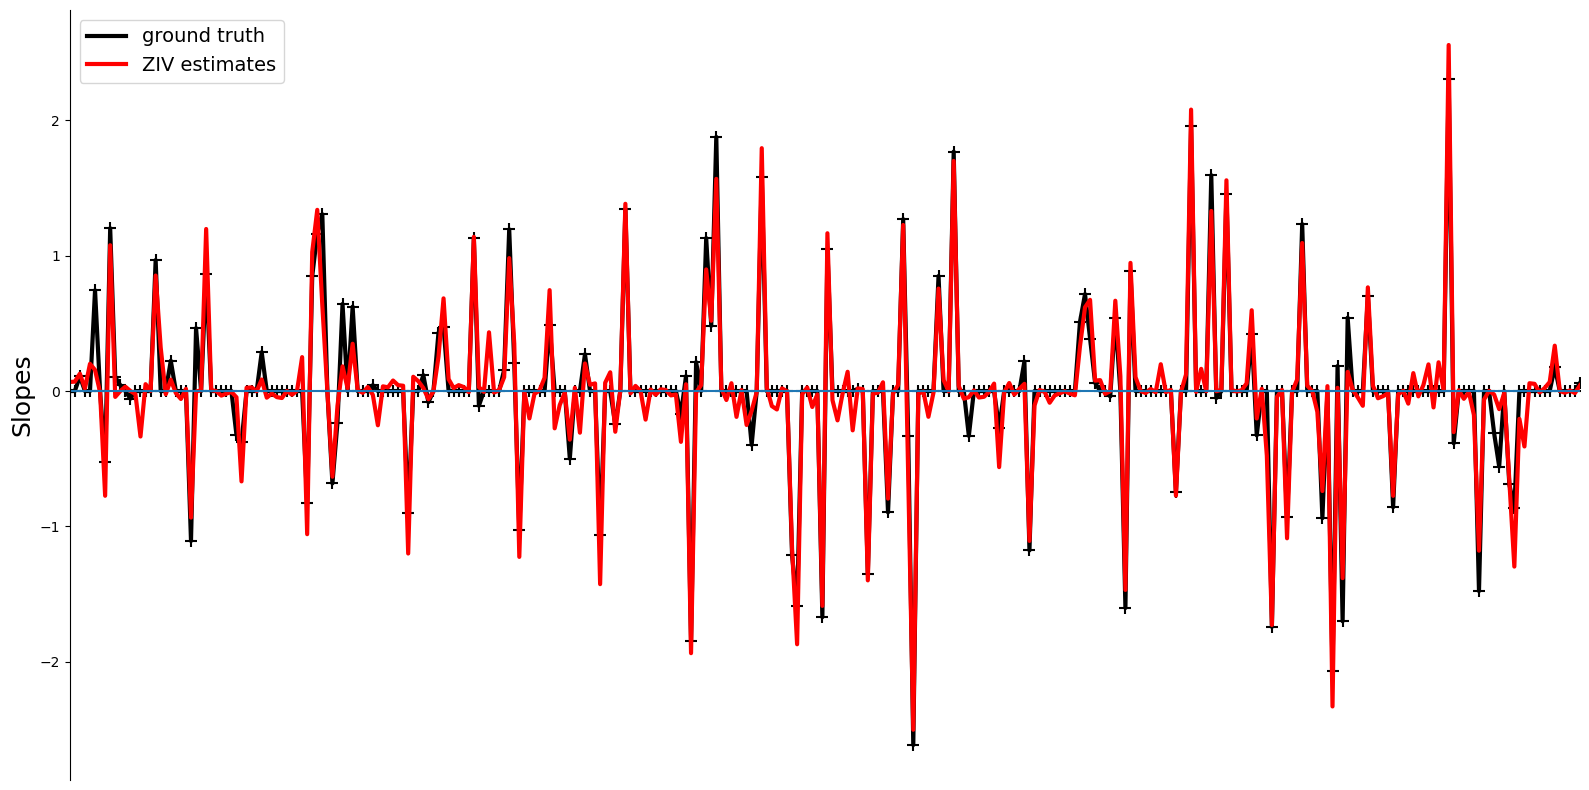

In [5]:
# Initialize and Fit the model
ziv = ZIV(data = data, outcome_name = 'outcome', 
          feature_conti_name = list(data.columns[1:]), 
          feature_cate_name = [],
          confounder_conti_name = [], 
          confounder_cate_name = [],
          batch_size = None, device = 'cpu')
FVE_df, coefficient_df, train_prediction, train_error = ziv.fit(lr = 0.5, 
                                                                min_loss_stop_fraction_diff = 0.5, 
                                                                lr_schedule_step = 1000, lr_sch_gamma = 0.8, 
                                                                verbose = True, true_beta = true_beta)

In [6]:
# Prediction
ziv.predict(data)

array([ -6.16116183,  -9.7065871 ,   9.39601902, ...,  -1.35573672,
       -10.34292415, -15.32255243])

# Inference results

In [7]:
# Total signal profile
FVE_df

{'FVE': [0.5471045284352669],
 'FVE_upper': [0.5727504541442435],
 'FVE_lower': [0.5201313771769599],
 'global_non_null': [0.38889883568244643],
 'global_non_null_upper': [0.45771992246308824],
 'global_non_null_lower': [0.319583434605548],
 'feature_variance': [108.00482558637253],
 'noise_variance': [89.30840070517361]}

In [8]:
# Local feature profile for each feature
coefficient_df

,feature_names,beta,pi
0,c1,0.277512,0.241163
1,c2,0.281306,0.247697
2,c3,0.368006,0.349277
3,c4,0.116656,0.157061
4,c5,0.438075,0.459043
...,...,...,...
295,c296,0.009460,0.128077
296,c297,-0.084287,0.148731
297,c298,0.032882,0.135984
298,c299,-0.110625,0.135136
